# ANALYSIS OF SMOKERS(COMBUSTIBLE) & E-CIGARETTE USERS BASED ON DEMOGRAPHICS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD THE ASC FILE INTO PANDAS

The idea of loading the data is taken from - https://github.com/AllenDowney/ExploratoryDataAnalysis/blob/master/brfss_validate.ipynb

In [2]:
url = 'https://www.cdc.gov/brfss/annual_data/2017/llcp_varlayout_17_onecolumn.html'

In [3]:
file = 'LLCP2017.ASC'

## WEB SCRAPPING

tables = pd.read_html(url)

In [4]:
layout = tables[0]
layout.index = layout['Variable Name']
layout

,Starting Column,Variable Name,Field Length
Variable Name,,,
_STATE,1,_STATE,2
FMONTH,17,FMONTH,2
IDATE,19,IDATE,8
IMONTH,19,IMONTH,2
IDAY,21,IDAY,2
IYEAR,23,IYEAR,4
DISPCODE,32,DISPCODE,4
SEQNO,36,SEQNO,10
_PSU,36,_PSU,10


In [5]:
## SELECT THE NAMES OF THE COLUMNS THAT WE ARE INTERESTED IN

col_names = ['SEX','_AGE_G','_RACE','MARITAL','RENTHOM1','EDUCA','EMPLOY1','INCOME2','SMOKE100','SMOKDAY2','STOPSMK2','LASTSMK2','ECIGARET','ECIGNOW']
 

In [6]:
colspecs = []
for name in col_names:
    start, _, length = layout.loc[name]
    colspecs.append((start-1, start+length-1))
    
colspecs

[(124, 125),
 (2032, 2033),
 (2023, 2024),
 (161, 162),
 (163, 164),
 (162, 163),
 (176, 177),
 (179, 181),
 (197, 198),
 (198, 199),
 (199, 200),
 (200, 202),
 (203, 204),
 (204, 205)]

In [7]:
## READ TABLE OF FIXED-WIDTH FORMATTED LINES INTO PANDAS DATAFRAME

df = pd.read_fwf(file,
                    colspecs = colspecs, 
                    names = col_names,
                    nrows=None)

df.head()

,SEX,_AGE_G,_RACE,MARITAL,RENTHOM1,EDUCA,EMPLOY1,INCOME2,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,ECIGARET,ECIGNOW
0,2,6,1,3.0,1.0,6.0,7.0,6.0,2.0,NaN,NaN,NaN,2.0,NaN
1,1,6,1,1.0,1.0,6.0,7.0,8.0,2.0,NaN,NaN,NaN,2.0,NaN
2,1,6,1,1.0,1.0,2.0,7.0,99.0,2.0,NaN,NaN,NaN,2.0,NaN
3,2,6,1,3.0,1.0,3.0,7.0,1.0,2.0,NaN,NaN,NaN,2.0,NaN
4,2,6,1,3.0,2.0,2.0,8.0,2.0,1.0,3.0,NaN,1.0,2.0,NaN


In [8]:
## RENAME THE COLUMNS


df.rename(columns = {'_STATE' : 'STATE',
                     'SEX' : 'GENDER',
                     'VETERAN3' : 'VETERAN',
                     'EDUCA': 'EDUCATION',
                        '_AGE_G' : 'AGE',
                        '_RACE' : 'RACE',
                    'EMPLOY1' : 'EMPLOYMENT',
                     'DECIDE' : 'DECISION',
                    'INCOME2' :  'INCOME',
                     'RENTHOM1' : 'HOME_STATUS',
                     'SMOKE100' : 'SMOKED',
                    'LASTSMK2' : 'LAST_SMOKED',
                    'SMOKDAY2' : 'CURRENT_STATUS_SMOKE',
                    'STOPSMK2' : "STOPPED_SMOKING",
                    'ECIGNOW' : 'CURRENT_ECIG'}, inplace = True)

df.head()

,GENDER,AGE,RACE,MARITAL,HOME_STATUS,EDUCATION,EMPLOYMENT,INCOME,SMOKED,CURRENT_STATUS_SMOKE,STOPPED_SMOKING,LAST_SMOKED,ECIGARET,CURRENT_ECIG
0,2,6,1,3.0,1.0,6.0,7.0,6.0,2.0,NaN,NaN,NaN,2.0,NaN
1,1,6,1,1.0,1.0,6.0,7.0,8.0,2.0,NaN,NaN,NaN,2.0,NaN
2,1,6,1,1.0,1.0,2.0,7.0,99.0,2.0,NaN,NaN,NaN,2.0,NaN
3,2,6,1,3.0,1.0,3.0,7.0,1.0,2.0,NaN,NaN,NaN,2.0,NaN
4,2,6,1,3.0,2.0,2.0,8.0,2.0,1.0,3.0,NaN,1.0,2.0,NaN


In [9]:
## DIMENSION OF DATAFRAME

df.shape

(450016, 14)

# RENAME THE VALUES OF THE VARIABLES

In [10]:
## SMOKED & ECIGARET

df['SMOKED'].replace([1,2],['Yes','No'],inplace = True)
df['ECIGARET'].replace([1,2],['Yes','No'],inplace = True)

## GENDER ##

df['GENDER'].replace([1,2],['MALE','FEMALE'], inplace = True)


## AGE ##

df['AGE'].replace([1,2,3,4,5,6],['Age 18 to 24','Age 25 to 34','Age 35 to 44',
                                     'Age 45 to 54','Age 55 to 64','Age 65 or older'],inplace = True)

## INCOME ##

df['INCOME'].replace([8,1,2,3,4,5,6,7],['>= $75,000','< $10,000','< $15,000','< $20,000','< $25,000', 
                                            '< $35,000','< $50,000', '< $75,000' ], inplace = True)


## EMPLOYEMENT ##

df['EMPLOYMENT'].replace([1,2,3,4,5,6,7,8],['employed for wages','self employed','out of work for more than 1 year or more',
                                                'out of work for less than 1 year','homemaker','student',
                                                'retired','unable to work'],inplace = True)

## EDUCATION ##

df['EDUCATION'].replace([6,5,4,3,2,1],
                            ['Graduated from college',
                            'Attended college',
                            '12 Grade',
                            '9 - 11 Grade',
                            '1 - 8 Grade', 'No school'], inplace = True)

## RACE ##

df['RACE'].replace([1,2,3,4,5,6,7,8],['White','Black','American Indian/Alaskan Native',
                                          'Asian','Native Hawaiian/other Pacific Islander',
                                          'Other race','Multiracial','Hispanic'], inplace = True)

## MARITAL ##
df['MARITAL'].replace([1,2,3,4,5,6],['Married','Divorced','Widowed','Separeted','Never Married',
                                         'A member of unmarried couple'], inplace = True)


## HOME STATUS ##
df['HOME_STATUS'].replace([1,2,3],['OWN HOUSE','RENT','OTHER'],inplace = True)


df.head()

,GENDER,AGE,RACE,MARITAL,HOME_STATUS,EDUCATION,EMPLOYMENT,INCOME,SMOKED,CURRENT_STATUS_SMOKE,STOPPED_SMOKING,LAST_SMOKED,ECIGARET,CURRENT_ECIG
0,FEMALE,Age 65 or older,White,Widowed,OWN HOUSE,Graduated from college,retired,"< $50,000",No,NaN,NaN,NaN,No,NaN
1,MALE,Age 65 or older,White,Married,OWN HOUSE,Graduated from college,retired,">= $75,000",No,NaN,NaN,NaN,No,NaN
2,MALE,Age 65 or older,White,Married,OWN HOUSE,1 - 8 Grade,retired,99,No,NaN,NaN,NaN,No,NaN
3,FEMALE,Age 65 or older,White,Widowed,OWN HOUSE,9 - 11 Grade,retired,"< $10,000",No,NaN,NaN,NaN,No,NaN
4,FEMALE,Age 65 or older,White,Widowed,RENT,1 - 8 Grade,unable to work,"< $15,000",Yes,3.0,NaN,1.0,No,NaN


In [11]:
## DEMOGRAPHIC & SMOKING VARIABLES 

df_cig = df[['GENDER','AGE','RACE','MARITAL','HOME_STATUS','EDUCATION','EMPLOYMENT','INCOME','SMOKED',
                    'LAST_SMOKED',
                    'CURRENT_STATUS_SMOKE',
                    "STOPPED_SMOKING"]]

## DEMOGRAPHIC & ECIGARET VARIABLES 

df_Ecig = df[['GENDER','AGE','RACE','MARITAL','HOME_STATUS','EDUCATION','EMPLOYMENT','INCOME','ECIGARET',
                 'CURRENT_ECIG']]

In [12]:
## DROP THE VALUE WHERE PARTICIPANT NOT ASKED OR REFUSED TO ANSWER


df_cig = df_cig.drop(df_cig[df_cig.SMOKED.isin([9])].index)

df_Ecig = df_Ecig.drop(df_Ecig[df_Ecig.ECIGARET.isin([9])].index)

In [13]:
## PARTICIPANT WHO SMOKED ECIGARET 

df_cig =  df_cig[df_cig['SMOKED'] == 'Yes']

## PARTICIPANT WHO ARE ECIGARET USER

df_Ecig =  df_Ecig[df_Ecig['ECIGARET'] == 'Yes']

In [14]:
df_cig = df_cig.drop(df_cig[df_cig.GENDER.isin([9])].index)

df_Ecig = df_Ecig.drop(df_Ecig[df_Ecig.GENDER.isin([9])].index)

# IS THERE A CORRELATION BETWEEN INCOME & SMOKING/ECIGARET & DIFFERS IN GENDER??

In [15]:
## SLICE INCOME FROM SMOKED DATA

cig_income = pd.DataFrame(df_cig.groupby(['GENDER','INCOME']).size().rename('COUNT'))
cig_income = cig_income.reset_index()

cig_income = cig_income.drop(cig_income[cig_income.INCOME.isin([77,99])].index)
cig_income

,GENDER,INCOME,COUNT
2,FEMALE,"< $10,000",5365
3,FEMALE,"< $15,000",5961
4,FEMALE,"< $20,000",7577
5,FEMALE,"< $25,000",8808
6,FEMALE,"< $35,000",9484
7,FEMALE,"< $50,000",11235
8,FEMALE,"< $75,000",11520
9,FEMALE,">= $75,000",18216
12,MALE,"< $10,000",3758
13,MALE,"< $15,000",4338


In [16]:
## SLICE INCOME FROM SMOKED DATA

Ecig_income = pd.DataFrame(df_Ecig.groupby(['GENDER','INCOME']).size().rename('COUNT'))
Ecig_income = Ecig_income.reset_index()


Ecig_income = Ecig_income.drop(Ecig_income[Ecig_income.INCOME.isin([77,99])].index)
Ecig_income

,GENDER,INCOME,COUNT
2,FEMALE,"< $10,000",2451
3,FEMALE,"< $15,000",2408
4,FEMALE,"< $20,000",2959
5,FEMALE,"< $25,000",3412
6,FEMALE,"< $35,000",3422
7,FEMALE,"< $50,000",3920
8,FEMALE,"< $75,000",3888
9,FEMALE,">= $75,000",5525
12,MALE,"< $10,000",1668
13,MALE,"< $15,000",1698


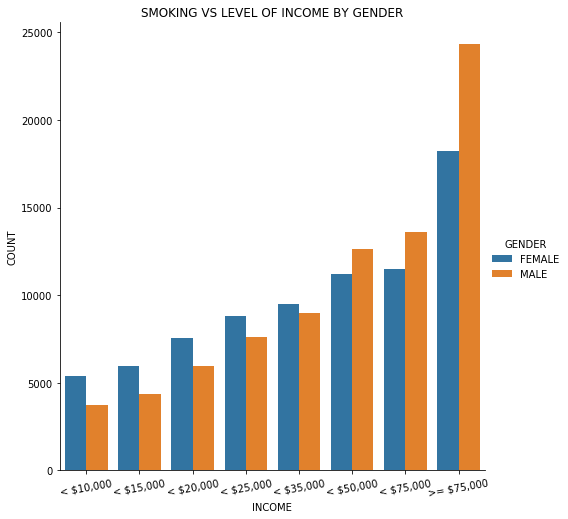

In [17]:
sns.catplot(y="COUNT", x = 'INCOME',hue="GENDER", data= cig_income,
                height=7, kind="bar")
plt.title('SMOKING VS LEVEL OF INCOME BY GENDER')

plt.xticks(plt.xticks()[0], cig_income.INCOME, rotation=10)
plt.show()

([<matplotlib.axis.XTick at 0x13bd95d0668>,
 <a list of 8 Text xticklabel objects>)

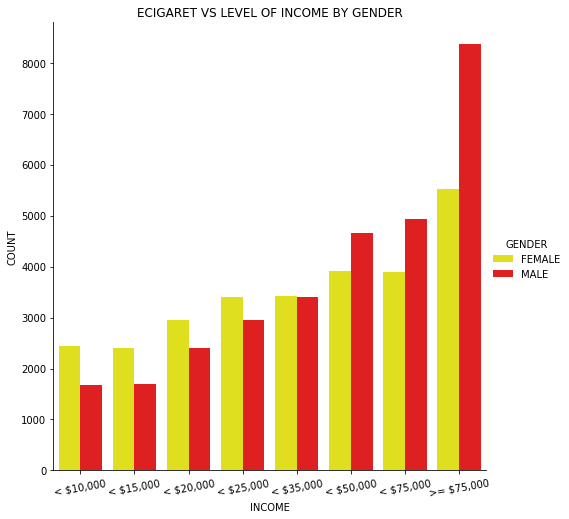

In [18]:
sns.catplot(x="INCOME", y = 'COUNT',hue="GENDER", data= Ecig_income,
                height=7, kind="bar", palette=sns.color_palette(['yellow', 'red']))
plt.title('ECIGARET VS LEVEL OF INCOME BY GENDER')

plt.xticks(plt.xticks()[0], Ecig_income.INCOME, rotation=10)

# IS THERE A CORRELATION BETWEEN EDUCATION & SMOKING/ECIGARET & DIFFERS IN GENDER??

In [19]:
cig_edu = pd.DataFrame(df_cig.groupby(['GENDER','EDUCATION']).size().rename('COUNT'))
cig_edu = cig_edu.reset_index()

cig_edu = cig_edu.drop(cig_edu[cig_edu.EDUCATION.isin([9])].index)
cig_edu

,GENDER,EDUCATION,COUNT
1,FEMALE,1 - 8 Grade,1639
2,FEMALE,12 Grade,28512
3,FEMALE,9 - 11 Grade,5922
4,FEMALE,Attended college,30547
5,FEMALE,Graduated from college,26131
6,FEMALE,No school,61
8,MALE,1 - 8 Grade,2662
9,MALE,12 Grade,29969
10,MALE,9 - 11 Grade,6361
11,MALE,Attended college,26094


In [20]:
Ecig_edu = pd.DataFrame(df_Ecig.groupby(['GENDER','EDUCATION']).size().rename('COUNT'))
Ecig_edu = Ecig_edu.reset_index()

Ecig_edu = Ecig_edu.drop(Ecig_edu[Ecig_edu.EDUCATION.isin([9])].index)
Ecig_edu

,GENDER,EDUCATION,COUNT
1,FEMALE,1 - 8 Grade,450
2,FEMALE,12 Grade,10194
3,FEMALE,9 - 11 Grade,2333
4,FEMALE,Attended college,11870
5,FEMALE,Graduated from college,7502
6,FEMALE,No school,8
8,MALE,1 - 8 Grade,553
9,MALE,12 Grade,12061
10,MALE,9 - 11 Grade,2558
11,MALE,Attended college,10996


([<matplotlib.axis.XTick at 0x13bd9687908>,
 <a list of 6 Text xticklabel objects>)

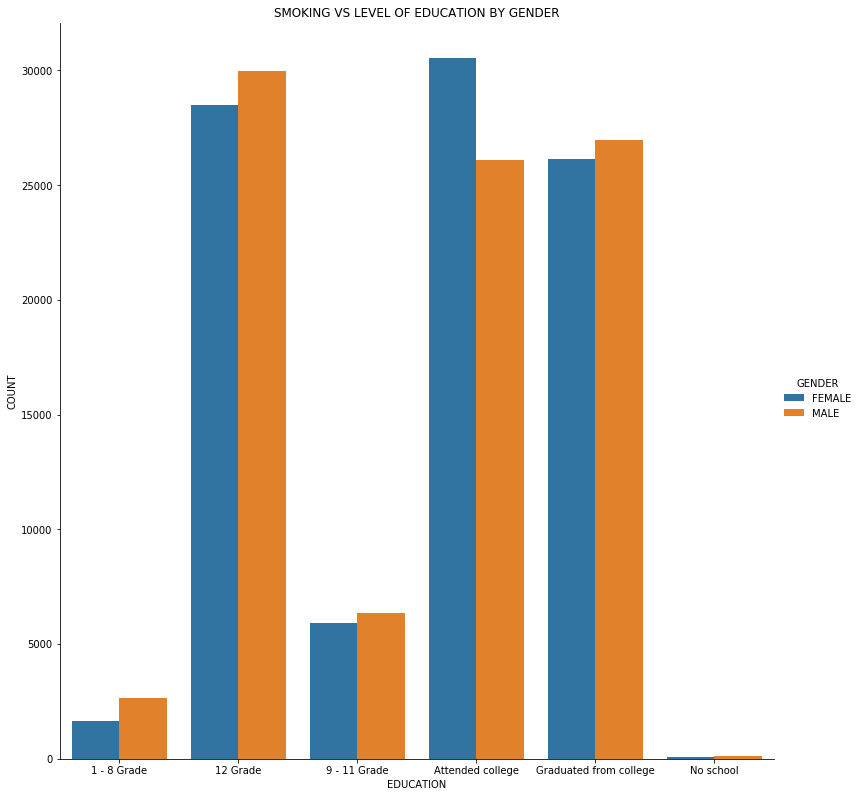

In [21]:
sns.catplot(x="EDUCATION", y = "COUNT",hue="GENDER", data= cig_edu,
                height=11, kind="bar")
plt.title('SMOKING VS LEVEL OF EDUCATION BY GENDER')

plt.xticks(plt.xticks()[0], cig_edu.EDUCATION, rotation=0)

([<matplotlib.axis.XTick at 0x13bdab4bbe0>,
 <a list of 6 Text xticklabel objects>)

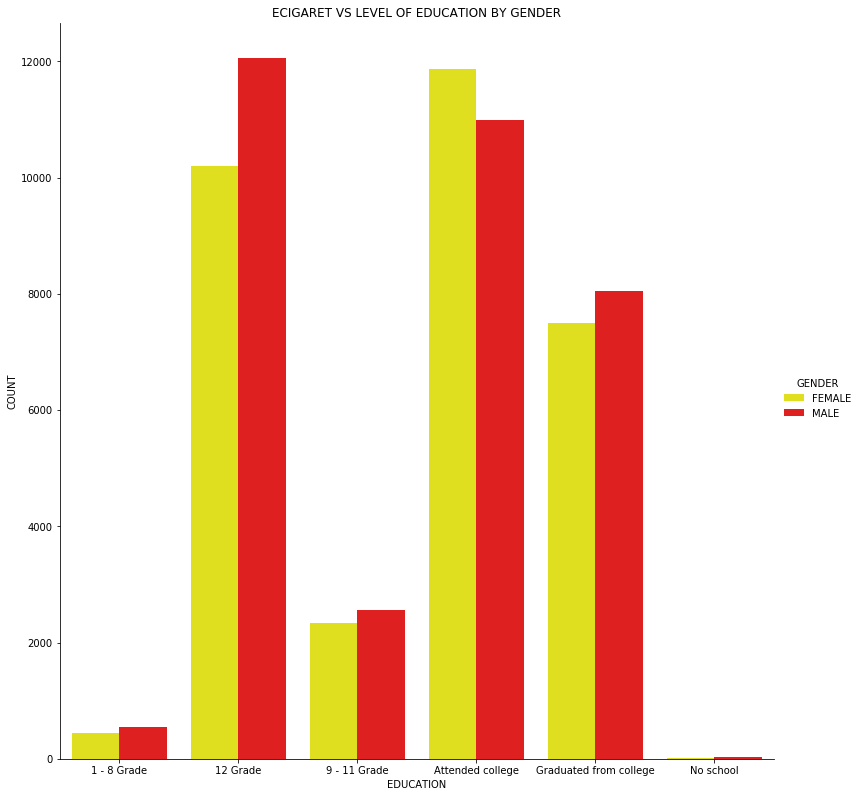

In [22]:
sns.catplot(y= "COUNT", x = 'EDUCATION', hue="GENDER", data= Ecig_edu,
                height= 11, kind="bar",palette=sns.color_palette(['yellow', 'red']))
plt.title('ECIGARET VS LEVEL OF EDUCATION BY GENDER')


plt.xticks(plt.xticks()[0], Ecig_edu.EDUCATION, rotation=0)

# IS THERE A CORRELATION BETWEEN AGE & SMOKING/ECIGARET & DIFFERS IN GENDER??

In [23]:
cig_age = pd.DataFrame(df_cig.groupby(['GENDER','AGE']).size().rename('COUNT'))
cig_age = cig_age.reset_index()


cig_age

,GENDER,AGE,COUNT
0,FEMALE,Age 18 to 24,1895
1,FEMALE,Age 25 to 34,7405
2,FEMALE,Age 35 to 44,9930
3,FEMALE,Age 45 to 54,13972
4,FEMALE,Age 55 to 64,22501
5,FEMALE,Age 65 or older,37358
6,MALE,Age 18 to 24,3123
7,MALE,Age 25 to 34,9176
8,MALE,Age 35 to 44,10695
9,MALE,Age 45 to 54,12994


In [24]:
Ecig_age = pd.DataFrame(df_Ecig.groupby(['GENDER','AGE']).size().rename('COUNT'))
Ecig_age = Ecig_age.reset_index()

Ecig_age = Ecig_age.drop(Ecig_age[Ecig_age.AGE.isin(["Refused","Don’t know/Not sure"])].index)
Ecig_age

,GENDER,AGE,COUNT
0,FEMALE,Age 18 to 24,3837
1,FEMALE,Age 25 to 34,5987
2,FEMALE,Age 35 to 44,5022
3,FEMALE,Age 45 to 54,5980
4,FEMALE,Age 55 to 64,6986
5,FEMALE,Age 65 or older,4602
6,MALE,Age 18 to 24,6202
7,MALE,Age 25 to 34,8274
8,MALE,Age 35 to 44,5808
9,MALE,Age 45 to 54,5163


([<matplotlib.axis.XTick at 0x13bdabf40f0>,
 <a list of 6 Text xticklabel objects>)

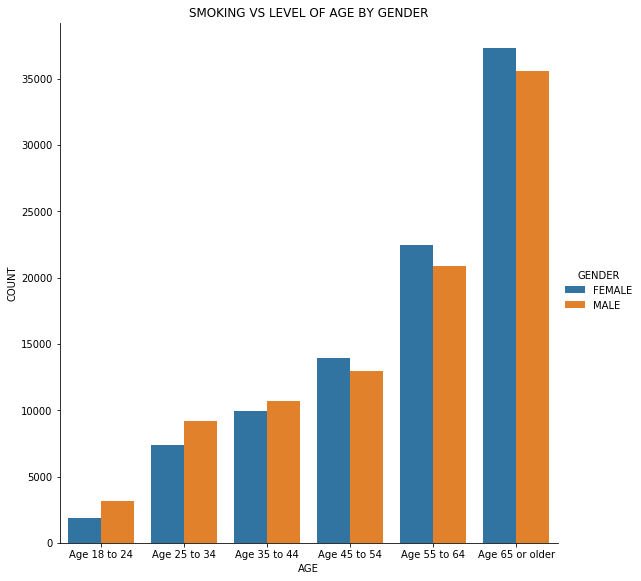

In [25]:
sns.catplot(x="AGE", y = 'COUNT',hue="GENDER", data= cig_age,
                height=8, kind="bar")
plt.title('SMOKING VS LEVEL OF AGE BY GENDER')


plt.xticks(plt.xticks()[0], cig_age.AGE, rotation=0)

([<matplotlib.axis.XTick at 0x13bdade5c50>,
 <a list of 6 Text xticklabel objects>)

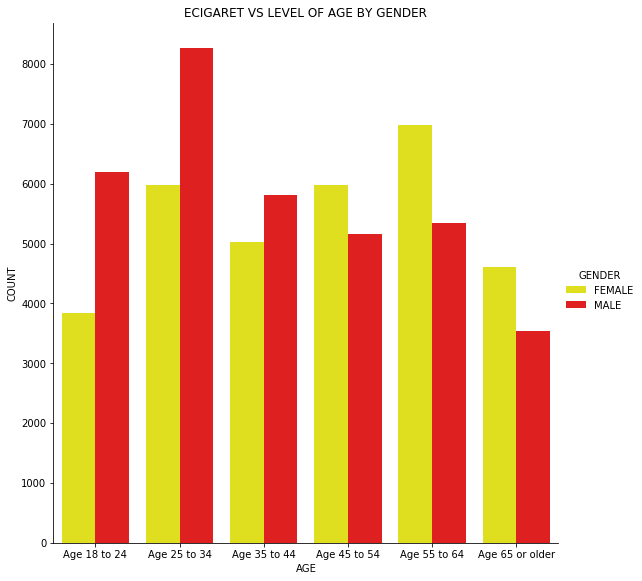

In [26]:
sns.catplot(x="AGE", y = 'COUNT',hue="GENDER", data= Ecig_age,
                height=8, kind="bar",palette=sns.color_palette(['yellow', 'red']))
plt.title('ECIGARET VS LEVEL OF AGE BY GENDER')


plt.xticks(plt.xticks()[0], Ecig_age.AGE, rotation=0)

# EMPLOYEMENT STATUS & SMOKING/ECIGARET & DIFFERS IN GENDER??

In [27]:
cig_emplymnt = pd.DataFrame(df_cig.groupby(['GENDER','EMPLOYMENT']).size().rename('COUNT'))
cig_emplymnt = cig_emplymnt.reset_index()

cig_emplymnt = cig_emplymnt.drop(cig_emplymnt[cig_emplymnt.EMPLOYMENT.isin([9])].index)
cig_emplymnt

,GENDER,EMPLOYMENT,COUNT
1,FEMALE,employed for wages,31417
2,FEMALE,homemaker,7371
3,FEMALE,out of work for less than 1 year,2088
4,FEMALE,out of work for more than 1 year or more,2730
5,FEMALE,retired,31283
6,FEMALE,self employed,5509
7,FEMALE,student,969
8,FEMALE,unable to work,11238
10,MALE,employed for wages,35699
11,MALE,homemaker,324


Text(0.5, 1.0, 'SMOKING VS EMPLOYEMENT STATUS BY GENDER')

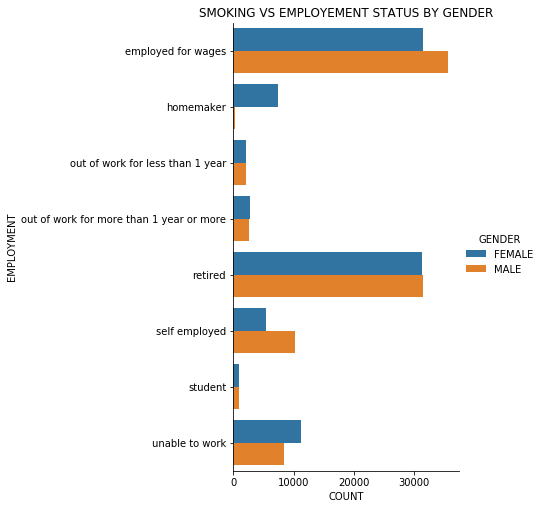

In [28]:
sns.catplot(y="EMPLOYMENT", x = 'COUNT',hue="GENDER", data= cig_emplymnt,
                height=7, kind="bar")
plt.title('SMOKING VS EMPLOYEMENT STATUS BY GENDER')

In [29]:
Ecig_emplymnt = pd.DataFrame(df_Ecig.groupby(['GENDER','EMPLOYMENT']).size().rename('COUNT'))
Ecig_emplymnt = Ecig_emplymnt.reset_index()

Ecig_emplymnt = Ecig_emplymnt.drop(Ecig_emplymnt[Ecig_emplymnt.EMPLOYMENT.isin([9])].index)
Ecig_emplymnt

,GENDER,EMPLOYMENT,COUNT
1,FEMALE,employed for wages,14328
2,FEMALE,homemaker,2424
3,FEMALE,out of work for less than 1 year,1268
4,FEMALE,out of work for more than 1 year or more,1256
5,FEMALE,retired,4277
6,FEMALE,self employed,1982
7,FEMALE,student,1643
8,FEMALE,unable to work,5046
10,MALE,employed for wages,18698
11,MALE,homemaker,152


Text(0.5, 1.0, 'ECIGARET VS EMPLOYEMENT STATUS BY GENDER')

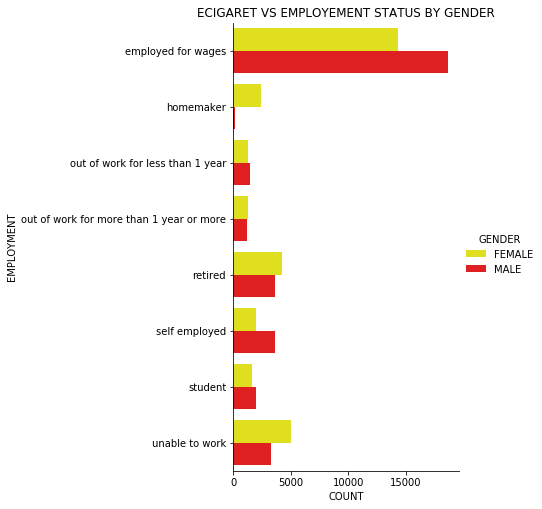

In [30]:
sns.catplot(y="EMPLOYMENT", x = 'COUNT',hue="GENDER", data= Ecig_emplymnt,
                height=7, kind="bar",palette=sns.color_palette(['yellow', 'red']))
plt.title('ECIGARET VS EMPLOYEMENT STATUS BY GENDER')

# HOME STATUS & SMOKING/ECIGARET & DIFFERS IN GENDER??

In [31]:
cig_house = pd.DataFrame(df_cig.groupby(['GENDER','HOME_STATUS']).size().rename('COUNT'))
cig_house = cig_house.reset_index()

cig_house = cig_house.drop(cig_house[cig_house.HOME_STATUS.isin([7,9])].index)
cig_house

,GENDER,HOME_STATUS,COUNT
2,FEMALE,OTHER,3778
3,FEMALE,OWN HOUSE,64646
4,FEMALE,RENT,24191
7,MALE,OTHER,3893
8,MALE,OWN HOUSE,64833
9,MALE,RENT,23329


In [32]:
Ecig_house = pd.DataFrame(df_Ecig.groupby(['GENDER','HOME_STATUS']).size().rename('COUNT'))
Ecig_house = Ecig_house.reset_index()

Ecig_house = Ecig_house.drop(Ecig_house[Ecig_house.HOME_STATUS.isin([7,9])].index)
Ecig_house

,GENDER,HOME_STATUS,COUNT
2,FEMALE,OTHER,2495
3,FEMALE,OWN HOUSE,17002
4,FEMALE,RENT,12782
7,MALE,OTHER,3297
8,MALE,OWN HOUSE,16617
9,MALE,RENT,14252


Text(0.5, 1.0, 'SMOKING VS HOME STATUS BY GENDER')

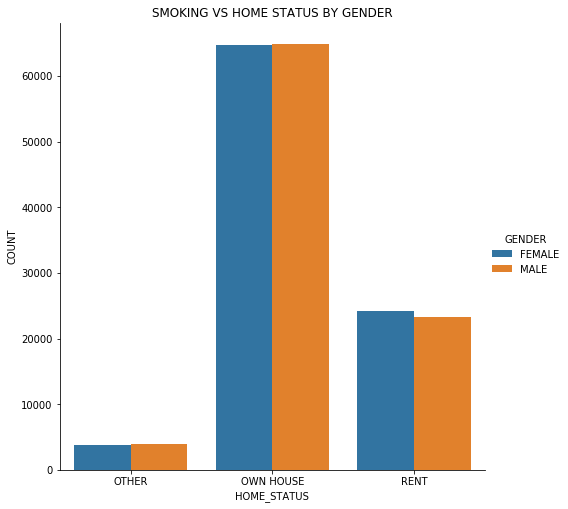

In [33]:
sns.catplot(x="HOME_STATUS", y = 'COUNT',hue="GENDER", data= cig_house,
                height=7, kind="bar")
plt.title('SMOKING VS HOME STATUS BY GENDER')

Text(0.5, 1.0, 'ECIGARET VS HOME STATUS BY GENDER')

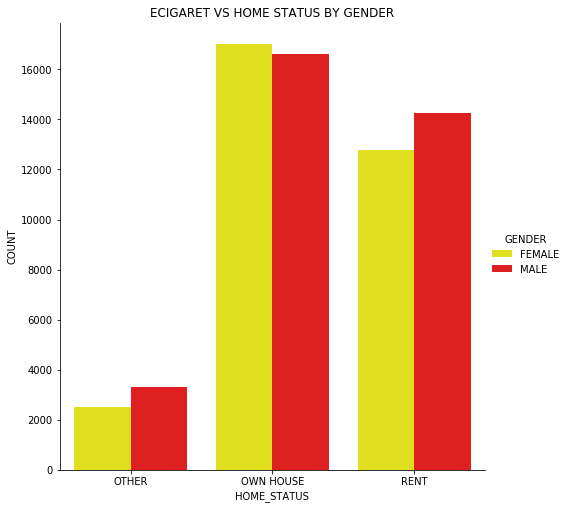

In [34]:
sns.catplot(x="HOME_STATUS", y = 'COUNT',hue="GENDER", data= Ecig_house,
                height=7, kind="bar",palette=sns.color_palette(['yellow', 'red'])) 
plt.title('ECIGARET VS HOME STATUS BY GENDER')

# RACE & SMOKING/ECIGARET & DIFFERS IN GENDER??

In [35]:
cig_race = pd.DataFrame(df_cig.groupby(['GENDER','RACE']).size().rename('COUNT'))
cig_race = cig_race.reset_index()

cig_race = cig_race.drop(cig_race[cig_race.RACE.isin([9])].index)
cig_race

,GENDER,RACE,COUNT
1,FEMALE,American Indian/Alaskan Native,2267
2,FEMALE,Asian,627
3,FEMALE,Black,6610
4,FEMALE,Hispanic,4576
5,FEMALE,Multiracial,2156
6,FEMALE,Native Hawaiian/other Pacific Islander,303
7,FEMALE,Other race,413
8,FEMALE,White,74614
10,MALE,American Indian/Alaskan Native,2131
11,MALE,Asian,1521


In [36]:
Ecig_race = pd.DataFrame(df_Ecig.groupby(['GENDER','RACE']).size().rename('COUNT'))
Ecig_race = Ecig_race.reset_index()

Ecig_race = Ecig_race.drop(Ecig_race[Ecig_race.RACE.isin([9])].index)
Ecig_race

,GENDER,RACE,COUNT
1,FEMALE,American Indian/Alaskan Native,851
2,FEMALE,Asian,364
3,FEMALE,Black,2348
4,FEMALE,Hispanic,2341
5,FEMALE,Multiracial,1129
6,FEMALE,Native Hawaiian/other Pacific Islander,130
7,FEMALE,Other race,161
8,FEMALE,White,24636
10,MALE,American Indian/Alaskan Native,896
11,MALE,Asian,842


Text(0.5, 1.0, 'SMOKING VS RACE BY GENDER')

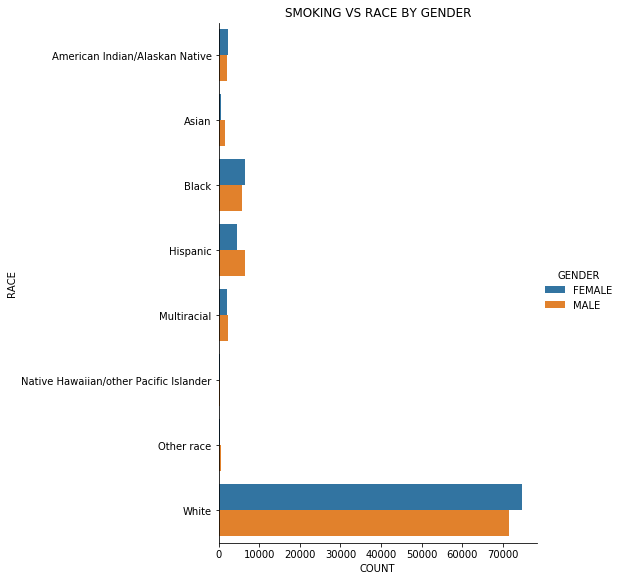

In [37]:
sns.catplot(y="RACE", x = 'COUNT',hue="GENDER", data= cig_race,
                height=8, kind="bar") 
plt.title('SMOKING VS RACE BY GENDER')

Text(0.5, 1.0, 'ECIGARET VS RACE BY GENDER')

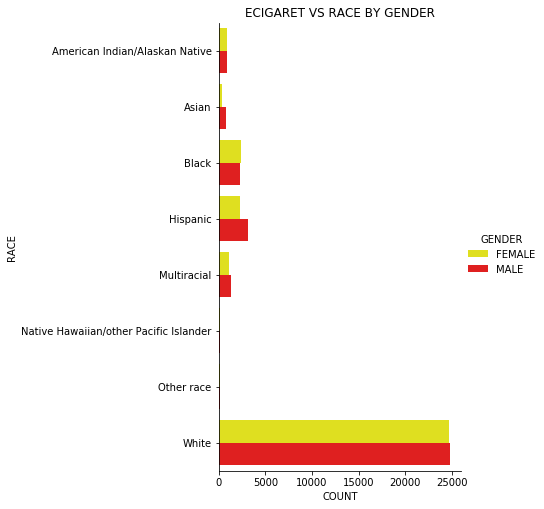

In [38]:
sns.catplot(y="RACE", x = 'COUNT',hue="GENDER", data= Ecig_race,
                height=7, kind="bar",palette=sns.color_palette(['yellow', 'red'])) 
plt.title('ECIGARET VS RACE BY GENDER')

# MARITAL STATUS & SMOKING/ECIGARET & DIFFERS IN GENDER??

In [39]:
cig_marital= pd.DataFrame(df_cig.groupby(['GENDER','MARITAL']).size().rename('COUNT'))
cig_marital = cig_marital.reset_index()

cig_marital = cig_marital.drop(cig_marital[cig_marital.MARITAL.isin([9])].index)
cig_marital

,GENDER,MARITAL,COUNT
1,FEMALE,A member of unmarried couple,3160
2,FEMALE,Divorced,18523
3,FEMALE,Married,39984
4,FEMALE,Never Married,10723
5,FEMALE,Separeted,2673
6,FEMALE,Widowed,17494
8,MALE,A member of unmarried couple,3536
9,MALE,Divorced,15025
10,MALE,Married,49343
11,MALE,Never Married,14442


In [40]:
Ecig_marital= pd.DataFrame(df_Ecig.groupby(['GENDER','MARITAL']).size().rename('COUNT'))
Ecig_marital = Ecig_marital.reset_index()

Ecig_marital = Ecig_marital.drop(Ecig_marital[Ecig_marital.MARITAL.isin([9])].index)
Ecig_marital

,GENDER,MARITAL,COUNT
1,FEMALE,A member of unmarried couple,2053
2,FEMALE,Divorced,6648
3,FEMALE,Married,11717
4,FEMALE,Never Married,7566
5,FEMALE,Separeted,1302
6,FEMALE,Widowed,2986
8,MALE,A member of unmarried couple,2442
9,MALE,Divorced,5277
10,MALE,Married,12183
11,MALE,Never Married,12246


Text(0.5, 1.0, 'ECIGARET VS MARITAL BY GENDER')

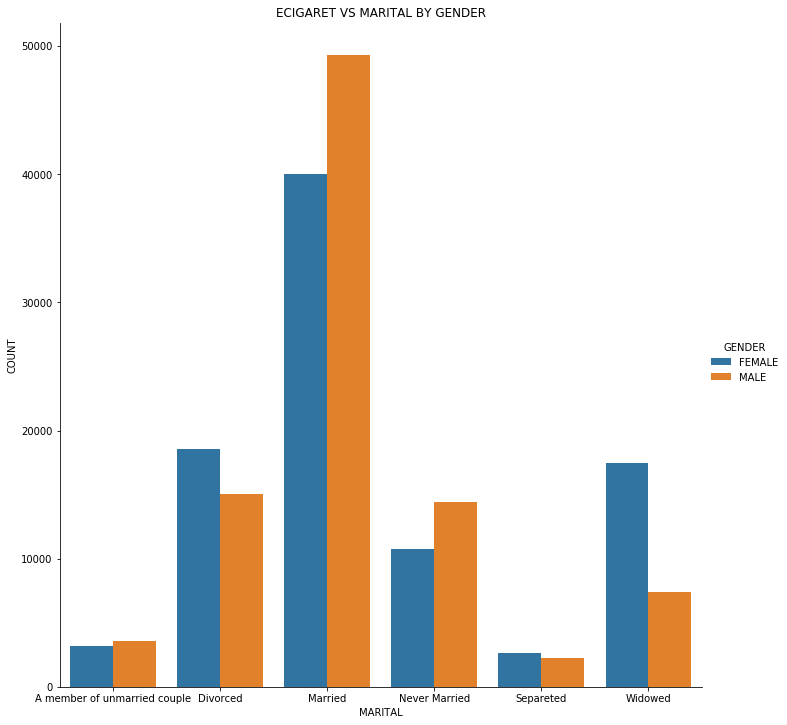

In [41]:
sns.catplot(y="COUNT", x = 'MARITAL',hue="GENDER", data= cig_marital,
                height=10, kind="bar") 
plt.title('ECIGARET VS MARITAL BY GENDER')

Text(0.5, 1.0, 'ECIGARET VS MARITAL BY GENDER')

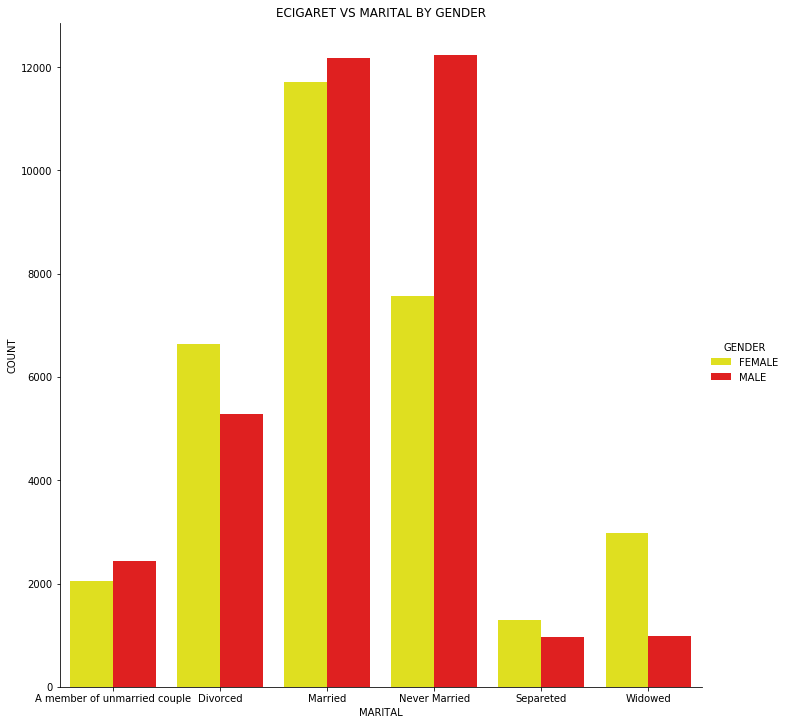

In [42]:
sns.catplot(y="COUNT", x = 'MARITAL',hue="GENDER", data= Ecig_marital,
                height=10, kind="bar",palette=sns.color_palette(['yellow', 'red'])) 
plt.title('ECIGARET VS MARITAL BY GENDER')

# FEW STATISTICS RELATED TO THE GIVEN POPULATION

In [43]:
## PARTICIPANTS WHO NEVER SMOKED MORE THAN 5 PACKS/USED ECIGERATE

len(df[(df['SMOKED'] == 'No') & (df['ECIGARET'] == 'Yes')])*100/len(df[df['SMOKED'] == 'No'])

5.726034521990703

In [44]:
## PERCENT OF PARTICIPANT SMOKES

len(df[df['SMOKED'] == 'Yes'])/len(df)

0.4124208917016284

In [45]:
## PERCENT OF PARTICIPANT EVER USED ECIGARET

len(df[df['ECIGARET'] == 'Yes'])/len(df)

0.1484236116049207

In [46]:
## COMBINE 'SOME DAYS' & 'EVERY DAY' as 1; MEANING THEY ARE ACTIVELY USING ECIGARET


df['CURRENT_ECIG'].replace([1,2,3],['Active','Active','Not Active'], inplace = True)

## DROP WHO REFUSED TO ANSWER/ DIDN'T ASK THEM

df = df.drop(df[df.CURRENT_ECIG.isin([7.0,9.0])].index)

In [47]:
df['CURRENT_ECIG'].value_counts()

Not Active    52954
Active        13677
Name: CURRENT_ECIG, dtype: int64

In [48]:
## PEOPLE WHO HAS STOPPED SMOKING & ACTIVELY USES ECIGARET


len(df[(df['STOPPED_SMOKING'] == 1) & (df['CURRENT_ECIG'] == "Active")])*100/len(df[df['ECIGARET'] == 'Yes'])

7.213527612880014